# Problem Statement

Develop a model to predict customer churn for a subscriptionbased service or business. Use historical customer data, including
features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient
Boosting to predict churn.

# Step #1:Import the data

In [221]:
import pandas as pd
df=pd.read_csv("Churn_Modelling.csv")

In [222]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [223]:
df.shape

(10000, 14)

In [224]:
# Get the information regarding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Step #2: Data Preparation

In [225]:
# Check Null values in the dataset
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [226]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [227]:
# To learn about the statistics about the data 
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [228]:
# Drop unimportant columns

df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [229]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [230]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [231]:
# Encode the categorical data

In [232]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [233]:
df=pd.get_dummies(df,drop_first=True)

In [234]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [235]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# Step #3: Visualize the dataset

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

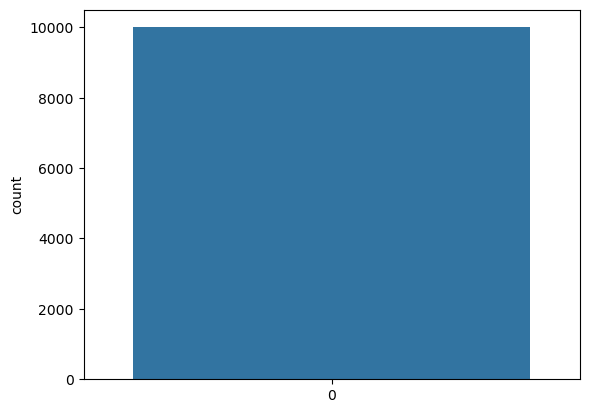

In [237]:
sns.countplot(df['Exited'])
plt.show()

In [238]:
X=df.drop('Exited',axis=1)
y=df['Exited']

# Step #4: Creating Training and Testing Data

In [239]:
# split the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

# Step #5: Feature Scaling

In [240]:
from sklearn.preprocessing import StandardScaler

In [241]:
sc=StandardScaler()

In [242]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [243]:
X_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

# Step #6: Logistic Regression

In [244]:
from sklearn.linear_model import LogisticRegression

In [245]:
model=LogisticRegression()

In [246]:
model.fit(X_train,y_train)

LogisticRegression()

In [247]:
y_pred=model.predict(X_test)

In [248]:
from sklearn.metrics import accuracy_score


In [249]:
# Compare and predict the success ratio
accuracy_score(y_test,y_pred)

0.808

In [250]:
# Since our data is imbalanced we cannot use accuracy to measure the model's power. Therefore we need to use use precision

In [251]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [252]:
precision_score(y_test,y_pred)

0.5891472868217055

In [253]:
recall_score(y_test,y_pred)

0.18673218673218672

In [254]:
f1_score(y_test,y_pred)

0.2835820895522388

In [255]:
# The scores are very low because our data is imbalanced.

In [256]:
# We balance the data with SMOTHE(Synthetic Minority Oversampling Technique)

# Step #7: Synthetic Minority Oversampling Technique

In [257]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [258]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [259]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [260]:
# WE used minoriy oversampling to fill the minority instead of reducing the majority because we loose the data 

In [261]:
# split the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

# Step #8: Feature Scaling

In [262]:
from sklearn.preprocessing import StandardScaler

In [263]:
sc=StandardScaler()

In [264]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [265]:
X_train

array([[-0.71440566,  0.71427043,  0.81472029, ...,  1.32169348,
        -0.64378212,  0.8086415 ],
       [ 1.0974932 ,  0.11094842, -1.38837929, ..., -0.75660508,
        -0.64378212,  0.8086415 ],
       [ 0.12605344,  0.01039476, -0.2868295 , ...,  1.32169348,
        -0.64378212,  0.8086415 ],
       ...,
       [ 0.20245882,  0.21150209,  1.18190355, ..., -0.75660508,
        -0.64378212,  0.8086415 ],
       [ 0.43167494,  0.61371676,  0.44753702, ..., -0.75660508,
         1.55332054,  0.8086415 ],
       [ 0.52991042,  1.01593143, -1.38837929, ...,  1.32169348,
        -0.64378212,  0.8086415 ]])

# Step #9: Applying Logistic Regression

In [266]:
from sklearn.linear_model import LogisticRegression

In [267]:
model=LogisticRegression()

In [268]:
model.fit(X_train,y_train)

LogisticRegression()

In [269]:
y_pred=model.predict(X_test)

In [270]:
from sklearn.metrics import accuracy_score

In [271]:
# Compare and predict the success ratio
accuracy_score(y_test,y_pred)

0.7727558066541117

In [272]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [273]:
precision_score(y_test,y_pred)

0.7625079164027866

In [274]:
recall_score(y_test,y_pred)

0.7752736638763683

In [275]:
f1_score(y_test,y_pred)

0.768837803320562

# Applying SVC

In [276]:
from sklearn import svm

In [277]:
svm=svm.SVC()

In [278]:
svm.fit(X_train,y_train)

SVC()

In [279]:
y_pred_new=svm.predict(X_test)

In [280]:
accuracy_score(y_test,y_pred_new)

0.8386691776522285

In [281]:
precision_score(y_test,y_pred_new)

0.8397645519947678

# KNeighbors Classifiers

In [282]:
from sklearn.neighbors import KNeighborsClassifier

In [283]:
knn=KNeighborsClassifier()

In [284]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [285]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
y_predict_knn=knn.predict(X_test)


In [286]:
precision_score(y_test,y_predict_knn)

0.8039950062421972

In [287]:
accuracy_score(y_test,y_predict_knn)

0.8182674199623352

# Decision Tree Classifier

In [288]:
from sklearn.tree import DecisionTreeClassifier

In [289]:
dt=DecisionTreeClassifier()

In [290]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [291]:
y_predict_dt=dt.predict(X_test)

In [292]:
accuracy_score(y_test,y_predict_dt)

0.8113622096672944

In [293]:
precision_score(y_test,y_predict_dt)

0.7902439024390244

# Random Forest Classifier

In [294]:
from sklearn.ensemble import RandomForestClassifier


In [295]:
rf=RandomForestClassifier()

In [296]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [297]:
y_predict_rf=rf.predict(X_test)

In [298]:
accuracy_score(y_test,y_predict_rf)

0.8681732580037664

In [299]:
precision_score(y_test,y_predict_rf)

0.8619808306709266

# Gradient Boosting Classifier

In [300]:
from sklearn.ensemble import GradientBoostingClassifier

In [301]:
gbc=GradientBoostingClassifier()

In [302]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [303]:
y_predict_gbc=gbc.predict(X_test)

In [304]:
accuracy_score(y_test,y_predict_gbc)

0.8383553044569994

In [305]:
precision_score(y_test,y_predict_gbc)

0.8387728459530026

In [306]:
final_df=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'ACC':[accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred_new),accuracy_score(y_test,y_predict_knn),accuracy_score(y_test,y_predict_dt),accuracy_score(y_test,y_predict_rf),accuracy_score(y_test,y_predict_gbc)]})

In [307]:
final_df

,Models,ACC
0,LR,0.772756
1,SVC,0.838669
2,KNN,0.818267
3,DT,0.811362
4,RF,0.868173
5,GBC,0.838355


In [308]:
# Since random forest has the highest accuracy value on our dataset we use RF as our model

In [309]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

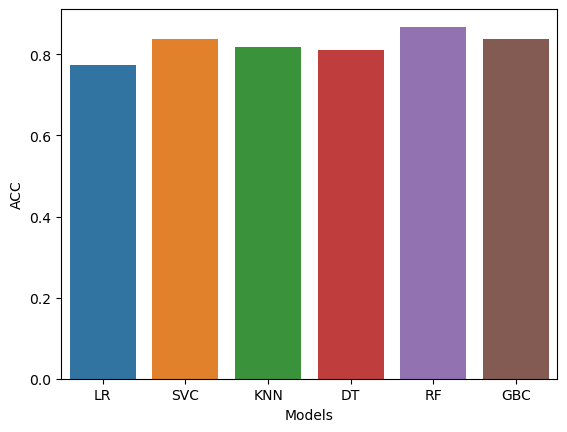

In [310]:
sns.barplot(x=final_df['Models'],y=final_df['ACC'])

In [311]:
final_df_ = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'PRC':[precision_score(y_test,y_pred),precision_score(y_test,y_pred_new),precision_score(y_test,y_predict_knn),precision_score(y_test,y_predict_dt),precision_score(y_test,y_predict_rf),precision_score(y_test,y_predict_gbc)]})

In [312]:
final_df_

,Models,PRC
0,LR,0.762508
1,SVC,0.839765
2,KNN,0.803995
3,DT,0.790244
4,RF,0.861981
5,GBC,0.838773


<Axes: xlabel='Models', ylabel='PRC'>

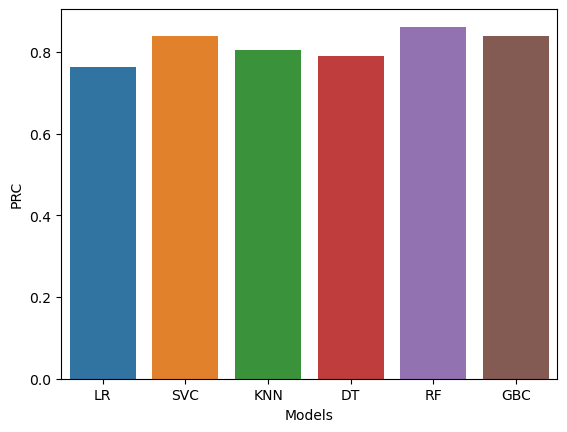

In [313]:
sns.barplot(x=final_df_['Models'],y=final_df_['PRC'])

# Step #10: Save the Model of Random Forest

In [314]:
#Enter the entire dataset
X_res=sc.fit_transform(X_res)

In [315]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [316]:
import joblib

In [317]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [318]:
saved_model=joblib.load('churn_predict_model')

In [319]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [320]:
saved_model.predict([[400,32,15,111110,0,0,0,10348.88,0,0,1]])

array([1], dtype=int64)

##### 1 indicates the customer exits the bank

In [321]:
saved_model.predict([[619,42,2,0,1,1,1,101348,1,0,0]])

array([0], dtype=int64)

###### 0 indicates the customer stays with the bank